In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Cargar los datos
df_train = pd.read_csv("train.csv")

# Crear la variable categórica a partir de SalePrice
q1 = df_train['SalePrice'].quantile(0.25)
q3 = df_train['SalePrice'].quantile(0.75)
df_train['PriceCategory'] = pd.cut(df_train['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])

# Definir X e y
X = df_train.select_dtypes(include=np.number).drop(['SalePrice'], axis=1)
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = df_train['PriceCategory'].loc[X.index]

# Codificar la variable de salida
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)




In [8]:
#Modelo 1
model1 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model1.fit(X_train, y_train)

print("🔹 Modelo 1 (ReLU + Adam):")
print(classification_report(y_test, model1.predict(X_test), target_names=encoder.classes_))


🔹 Modelo 1 (ReLU + Adam):
              precision    recall  f1-score   support

       Caras       0.90      0.83      0.86        88
  Económicas       0.80      0.81      0.80        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.83      0.84       337
weighted avg       0.84      0.84      0.84       337



In [12]:
#Modelo 2
model2 = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=500, random_state=42)
model2.fit(X_train, y_train)

print("🔸 Modelo 2 (tanh + SGD):")
print(classification_report(y_test, model2.predict(X_test), target_names=encoder.classes_))


🔸 Modelo 2 (tanh + SGD):
              precision    recall  f1-score   support

       Caras       0.91      0.85      0.88        88
  Económicas       0.78      0.80      0.79        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.84      0.84       337
weighted avg       0.84      0.84      0.84       337



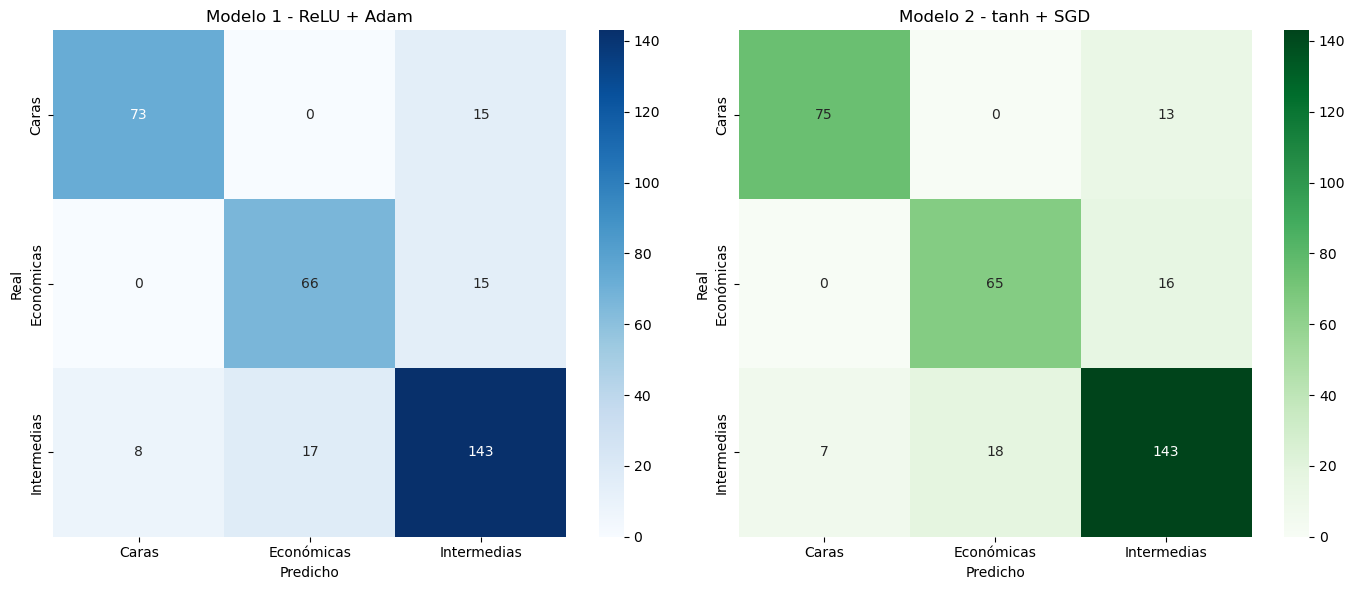

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir etiquetas
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Obtener etiquetas originales
labels = encoder.classes_

# Matrices de confusión
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

# Graficar ambas matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Modelo 1 - ReLU + Adam")
axes[0].set_xlabel("Predicho")
axes[0].set_ylabel("Real")

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Modelo 2 - tanh + SGD")
axes[1].set_xlabel("Predicho")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()
